# ELE510 Image Processing with robot vision: LAB, Exercise 1, Fundamentals.

**Purpose:** *To learn some basic operations on images using Python, OpenCV and other packages. The emphasis is on the fundamentals of digital images.*

The theory for this exercise can be found in chapter 1 and 2 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

**a)** What does a pixel value represent? What is the standard bit depth and why is it the common practice?

**b)** What is the difference between image processing and image analysis? What primary problems are they trying to solve?


**c)** Given a storage space of 512 GB, we would like to save a digital video recorded in grayscale that fills all the available memory. The video was recorded with no compression, a frame rate of 100 frames per second, and an image frame of $2048 \times 1024$ pixels. Then, how long would the lenght of the video be in time? Please provide an answer in HH:MM:SS format.


## Problem 2

In this problem we use one image, `flower.jpg` (relative path: `./images/flower.jpg`).


**a)** Import the image; let the name of the flower image be **A**. Find the following properties: height, width, channels, filesize [+]. Be aware tha opencv represents image colar channel in the order BGR (blue, green, red) instead of RGB as is more common.  Matplotlib use RGB, so if we are using matplotlib to show images they need to be converted first.

**b)** Image **A** is represented as a 3D array in Python. With **A** as input we now want to extract 4 different 2D images:
   - **R** representing the red colour component, 
   - **G** representing the green colour component,
   - **B** representing the blue colour component, and
   - **Gr** representing a grey level version.
    
The rgb components are found by using `A[:,:,k]` where `k=1,2 and 3`. The grey level image can be imported using a particular flag (`cv2.IMREAD_GRAYSCALE`), or converted from an already imported color-image to grayscale (find the cv2 function yourself in the documentation). Use `matplotlib` to display the colour image and the 3 colour components in the same figure.

Describe how the different colour components contributes to different parts of the image (the petals and the background). Show the gray level image in a separate figure. Describe this image in relation to the colour components.


<div class="alert alert-block alert-info">
    The filesize can be checked in <b>bytes</b> using the following commands: 

```python
import os 
filesize = os.path.getsize(my_path)
```
</div>


In [52]:
# Import useful packages
import os # useful for the filesize
import cv2
import matplotlib.pyplot as plt 

# Complete the parts with "..."

########################################################
######## a) 
# Import the image, which is located in the folder images/ (you can download it from CANVAS)
A_path = "./images/flower.jpg"
A = cv2.imread(A_path) 
# Convert the image from BGR (OpenCV standard) to RGB (standard)  
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# image properties
height = A.shape[0]
width = A.shape[1]
channels = A.shape[2]
filesize = os.path.getsize(A_path)
 
print('Image Dimension    : ', A.shape) 
print('Image Height       : ', height)
print('Image Width        : ', width)
print('Number of Channels : ', channels)

## The results should be:
# Image Dimension    :  (667, 500, 3)
# Image Height       :  667
# Image Width        :  500
# Number of Channels :  3

print('Image size         : ', filesize/1024, 'KB')

Image Dimension    :  (667, 500, 3)
Image Height       :  667
Image Width        :  500
Number of Channels :  3
Image size         :  48.078125 KB


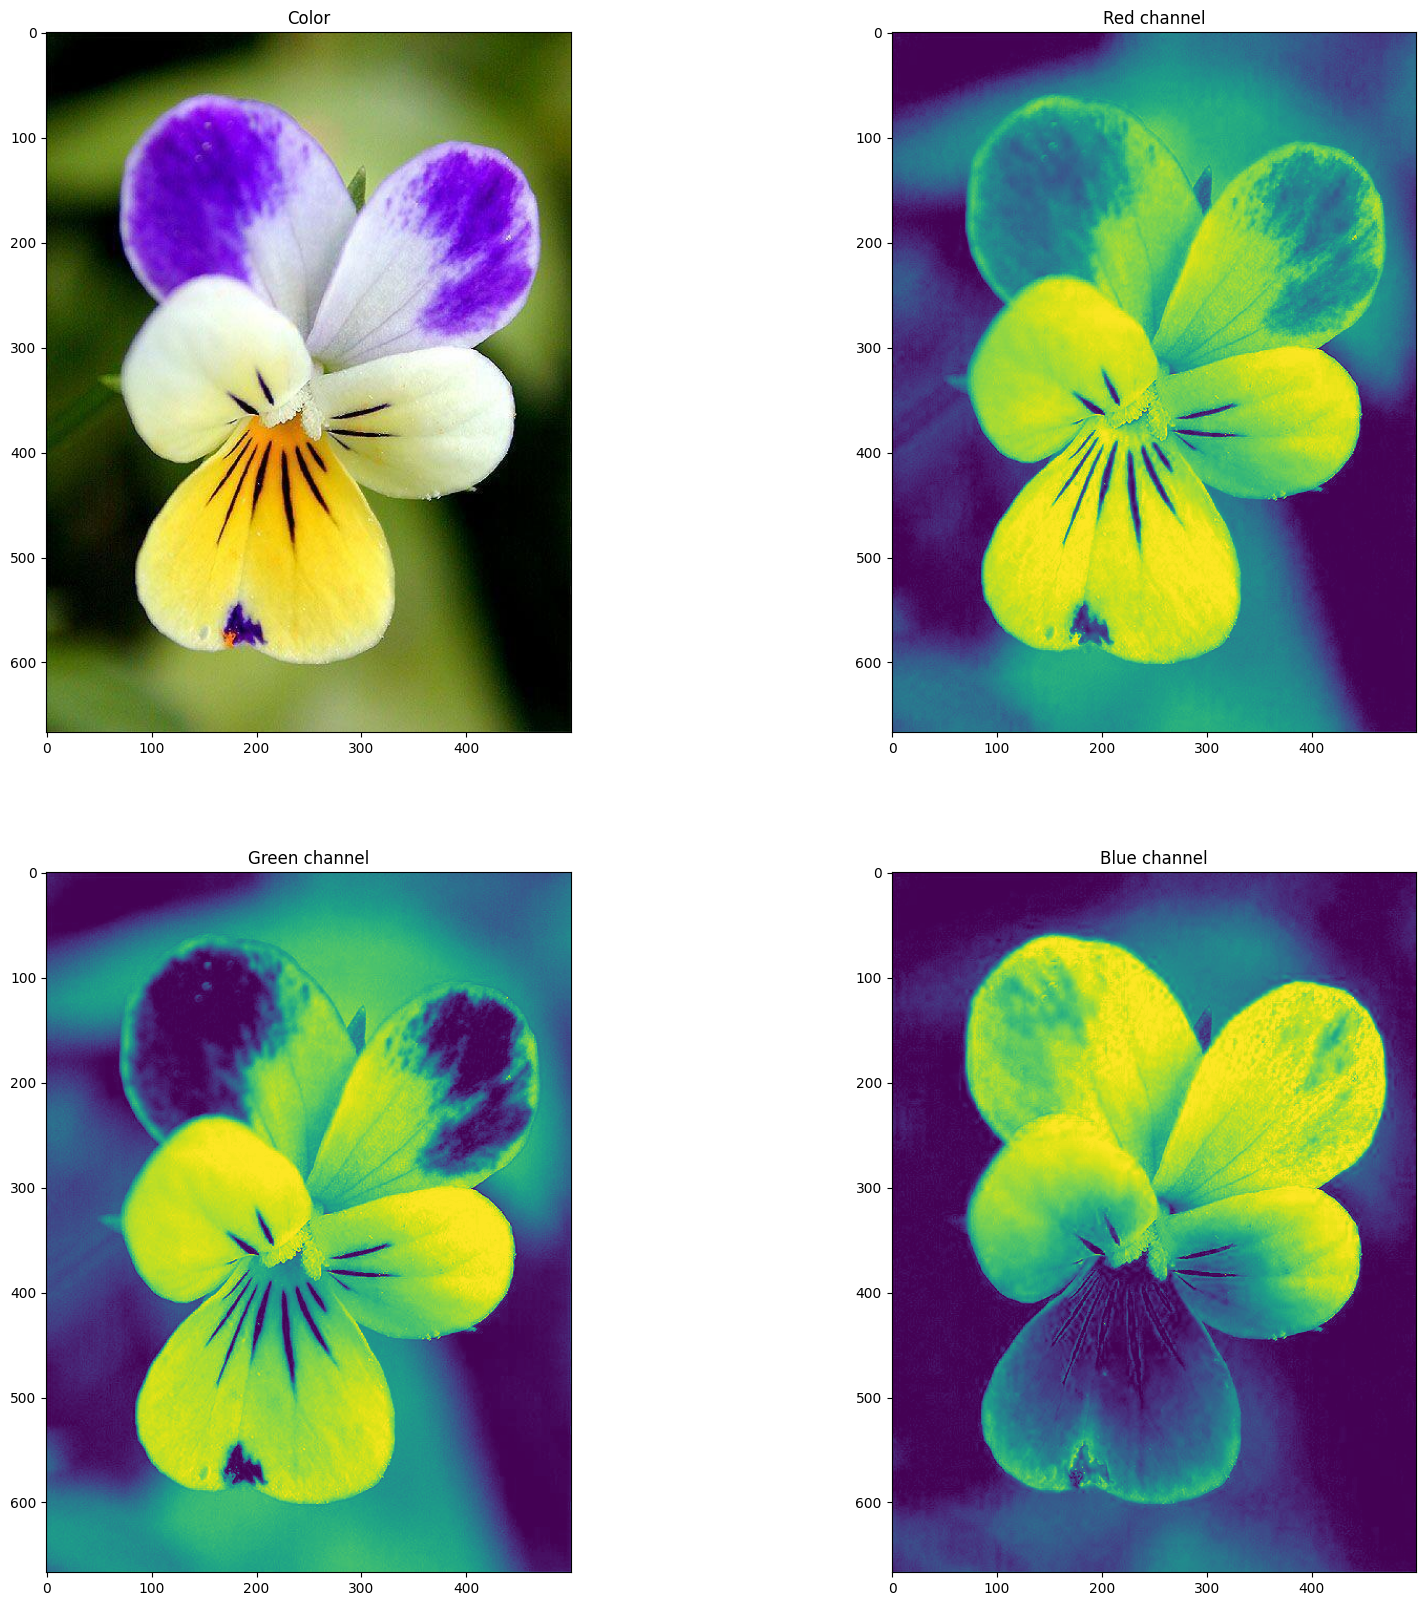

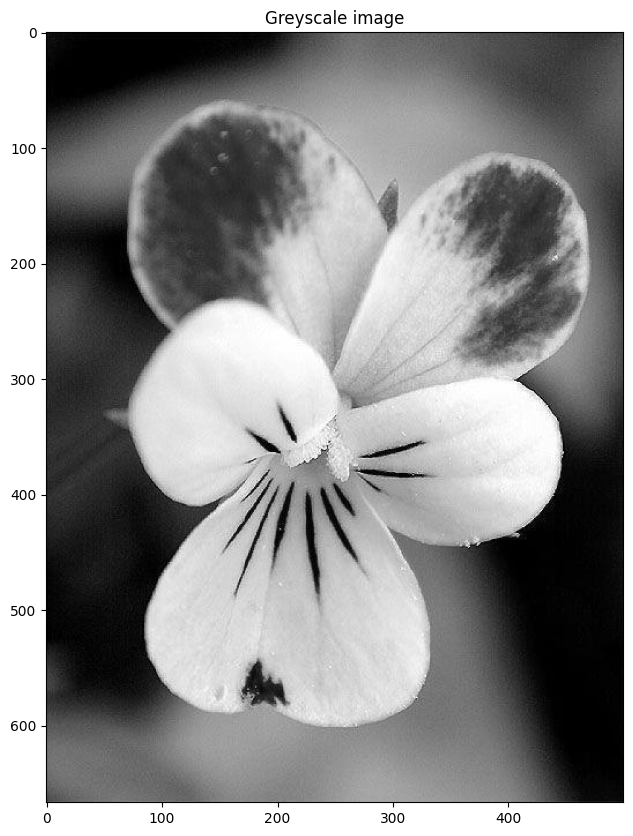

In [53]:
########################################################
######## b). 
# Extract 2D images (the various channels + grayscale)
R = A[:,:,0]
G = A[:,:,1]
B = A[:,:,2]

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(A)
plt.title('Color')
plt.subplot(222)
plt.imshow(R)
plt.title('Red channel')
plt.subplot(223)
plt.imshow(G)
plt.title('Green channel')
plt.subplot(224)
plt.imshow(B)
plt.title('Blue channel')
plt.show()

# Greyscale image
Gr = cv2.imread(A_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(Gr, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale image')
plt.show()


**Answer to question 2 b)** (describe): 

## Problem 2 continues

**c)** The image data can be written to new files with a chosen format. Use `cv2.imwrite` and JPG. We want to study different degrees of compression by using `[cv2.IMWRITE_JPEG_QUALITY, jpg_quality]` as option in the `cv2.imwrite` function, where `cv2.IMWRITE_JPEG_QUALITY` is the quality flag, and `jpg_quality` is the selected quality for saving the image. Let `jpg_qualities` be `[25,50,75,100]` and make a graph that show the filesize in kB as a function of `jpg_qualities` for this image. When a repeated procedure is done, like in this case, it is efficient to make a script or a function for the problem. Display the compressed images for `jpg_qualities=25` and `jpg_qualities=75` (use `plt.imshow`). Study these images and discuss the degradation of the images caused by the compression.

**d)** A simple way of finding objects in an image is by using thresholding. The OpenCV function `threshold`. performs simple thresholding and ouputs a logical image matrix. We want to find a logical mask identifying the flower (foreground and not the background) in our image. We can do that by combining the result from thresholding the red component and the blue component, `Fmask = Gmask or Rmask`. `Gmask` is the output from thresholding the green component with a level of approximately (180/255) and `Rmask` is the result from thresholding the red component with level (150/255) approximately. Execute these operations and adjust the two levels for the best result. Display the final logical image `Fmask` and describe the result.



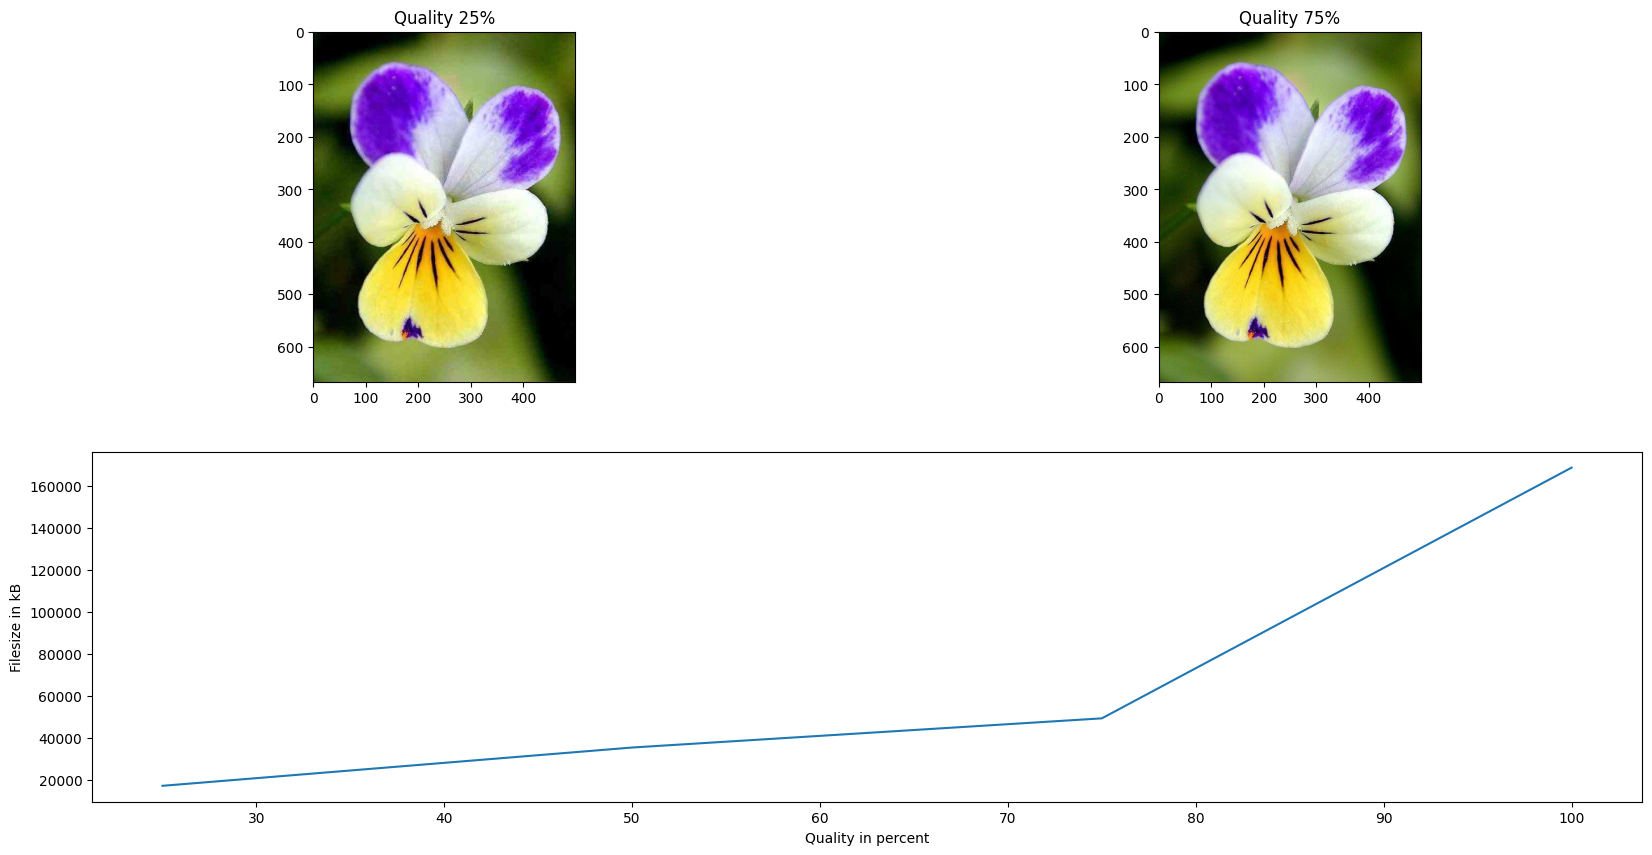

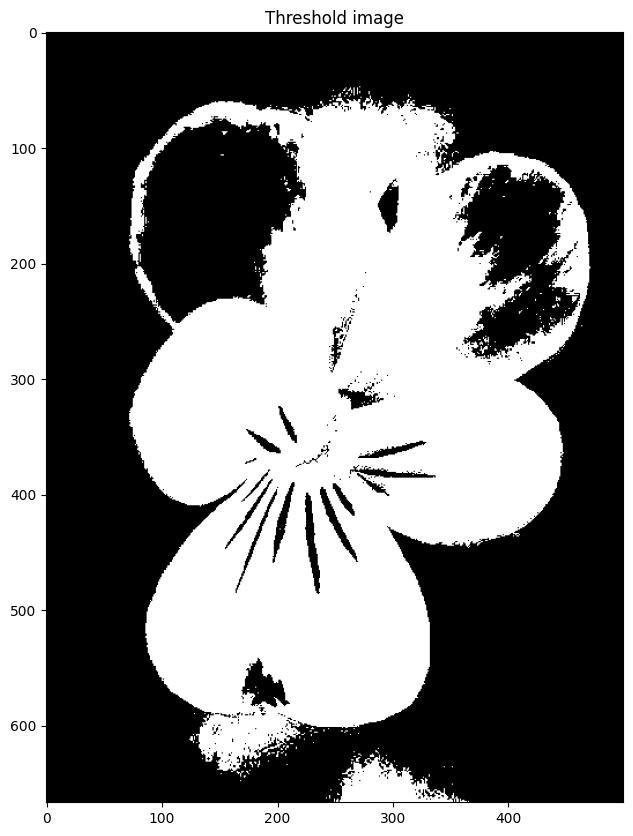

In [54]:
########################################################
######## c)
# Image compression
jpg_qualities = [25,50,75,100]
size = []

# write the images with a specific quality
# if A is in RGB, change it to BGR
A = cv2.cvtColor(A, cv2.COLOR_RGB2BGR) # convert it back to BGR
for jpg_quality in jpg_qualities:
    filename = "./images/flower{}.jpg".format(str(jpg_quality))
    cv2.imwrite(filename, A, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])
    size.append(os.path.getsize(filename))

# Read the two images
img25 = cv2.imread("./images/flower25.jpg")
img25 = cv2.cvtColor(img25, cv2.COLOR_BGR2RGB) # convert it back to RGB
img75 = cv2.imread("./images/flower75.jpg")
img75 = cv2.cvtColor(img75, cv2.COLOR_BGR2RGB) # convert it back to RGB

plt.figure(figsize=(20,10))
plt.subplot(212)
plt.plot(jpg_qualities, size) # Show the plot for the filesize in kB of the images generated
plt.xlabel("Quality in percent")
plt.ylabel("Filesize in kB")
plt.subplot(221)
plt.imshow(img25)
plt.title("Quality 25%")
plt.subplot(222)
plt.imshow(img75)
plt.title("Quality 75%")
plt.show()

########################################################
######## d)
# Thresholding: Black and White (binary) images

# _, means that we are skipping the first output.  
# look in OpenCV documentation to find out what the first output of threshold is
_, Gmask = cv2.threshold(G, 180, 255, cv2.THRESH_BINARY)
_, Rmask = cv2.threshold(R, 150, 255, cv2.THRESH_BINARY)
Fmask = cv2.bitwise_or(Gmask, Rmask)

plt.figure(figsize=(10,10))
plt.imshow(Fmask, cmap='gray', vmin=0, vmax=255)
plt.title('Threshold image')
plt.show()

**Answer to question 2 c)** (describe):

**Answer to question 2 d)** (describe):


## Problem 3

Write a function that extracts a rectangular region from an input image, commonly known as cropping. Give the function the name **image2roi** (roi = region of interest). Let this function work as follows:

**a)** Input parameters should be an iamge and the coordinates for the roi (fname, coords). First check if the image is colour or grey level. If it is colour a message should be printed out and the function closed (return). If it is a grey level image continue to the next step, **b)**.

**b)** The size of the image is computed and the image displayed with indexes shown along the axis. Extract the sub image (region of interest) given the coordinates, display it and the function ended.



In [55]:
'''
Function that takes in input an image and the coordinates for the ROI

''' 
def image2roi(img, coords):
    
    if len(img.shape)>2:
        ...
    
    # Plot the greyscale image and the ROI based on the coords values
    ...
    


In [56]:
##  To test your function, complete the following lines:

coords = ...
img = cv2.imread(...)  # use the flower image or something else you want. 

image2roi(..., ...)

TypeError: Can't convert object to 'str' for 'filename'

## Problem 4

The representation of a digital image as a column vector is very useful in some occasions. We therefore include this here, from a practical view, using `python`. To explore this we start with a tiny test image. Let the image be


\begin{equation}%\label{eq1} &<- KaTeX Parse-Error
    F(x,y) = \begin{bmatrix} 1 & 2 & 3 & 4\\ 5 & 6 & 7 & 8\\
     9 & 10 & 11 & 12\\ 13 & 14 & 15 & 16\end{bmatrix},
\end{equation}


To produce this image with `numpy`, use:

```python
F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
```

**a)** Use `numpy` to retrieve the first element of the first column, the first column and the first row. Do the same for the last column and row.

**b)** Use the `numpy` function `reshape` to reconstruct the image matrix. Refer to [numpy.reshape](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html#numpy.reshape) for full documentation.

**c)** Use `numpy` to create a boolean array that contains the value `True` for values multiple of 5 and bigger than 6.  



In [60]:
# Import useful packages
import numpy as np
from pprint import pprint

F = np.matrix('1 2 3 4;5 6 7 8;9 10 11 12;13 14 15 16')
print("F:")
pprint(F)

######## a)
f_ele = F[0, 0]
f_row = F[0, :].A1
f_col = F[:, 0].A1
print("f_ele: ")
pprint(f_ele)
print("f_row: ")
pprint(f_row) 
print("f_col: ")
pprint(f_col)

l_row = F[-1, :].A1
l_col = F[:, -1].A1
print("l_row: ")
pprint(l_row) 
print("l_col: ")
pprint(l_col)

######## b)
f_res = np.reshape()
print("f_res: ")
pprint(f_res)

######## c)
f_bool = ...
print("f_bool: ")
pprint(f_bool)


F:
matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
f_ele: 
1
f_row: 
array([1, 2, 3, 4])
f_col: 
array([ 1,  5,  9, 13])
l_row: 
array([13, 14, 15, 16])
l_col: 
array([ 4,  8, 12, 16])


TypeError: reshape() missing 2 required positional arguments: 'a' and 'newshape'

Problem 4, answers:

**a)**

**b)**

**c)**


### Delivery (dead line) on CANVAS: 08-09-2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Jorge Garcia-Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.